# Data Preprocessing & Visualization

In [16]:
# Import labraries

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Current working directory

os.getcwd()

'c:\\Users\\Admin\\Documents\\Apziva_Projects'

In [18]:
# Loading the dataset

df = pd.read_csv("term-deposit-marketing-2020.csv")

In [19]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [20]:
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no
39999,38,technician,married,secondary,no,1442,yes,no,cellular,3,jun,113,1,no


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [22]:
import pandas as pd

def value_counts_all_columns(df, dropna=True, normalize=False, sort=True, ascending=False):
    """
    Generate value counts for each column in a DataFrame.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to analyze
    dropna : bool, default True
        Whether to exclude NaN values from counts
    normalize : bool, default False
        If True, return relative frequencies instead of counts
    sort : bool, default True
        Whether to sort the results by count/frequency
    ascending : bool, default False
        Sort order (False for descending, True for ascending)
    
    Returns:
    --------
    dict
        Dictionary with column names as keys and value_counts Series as values
    """
    result = {}
    
    for column in df.columns:
        result[column] = df[column].value_counts(
            dropna=dropna, 
            normalize=normalize, 
            sort=sort, 
            ascending=ascending
        )
    
    return result



In [23]:
value_counts_all_columns(df)

{'age': age
 32    1909
 31    1826
 33    1770
 34    1730
 35    1721
       ... 
 90       1
 94       1
 86       1
 95       1
 81       1
 Name: count, Length: 70, dtype: int64,
 'job': job
 blue-collar      9383
 management       8166
 technician       6852
 admin            4483
 services         3910
 retired          1437
 self-employed    1414
 entrepreneur     1405
 unemployed       1104
 housemaid        1087
 student           524
 unknown           235
 Name: count, dtype: int64,
 'marital': marital
 married     24386
 single      10889
 divorced     4725
 Name: count, dtype: int64,
 'education': education
 secondary    20993
 tertiary     11206
 primary       6270
 unknown       1531
 Name: count, dtype: int64,
 'default': default
 no     39191
 yes      809
 Name: count, dtype: int64,
 'balance': balance
 0        3209
 1         179
 2         141
 4         126
 3         124
          ... 
 2694        1
 27624       1
 2587        1
 12322       1
 2444        1
 N

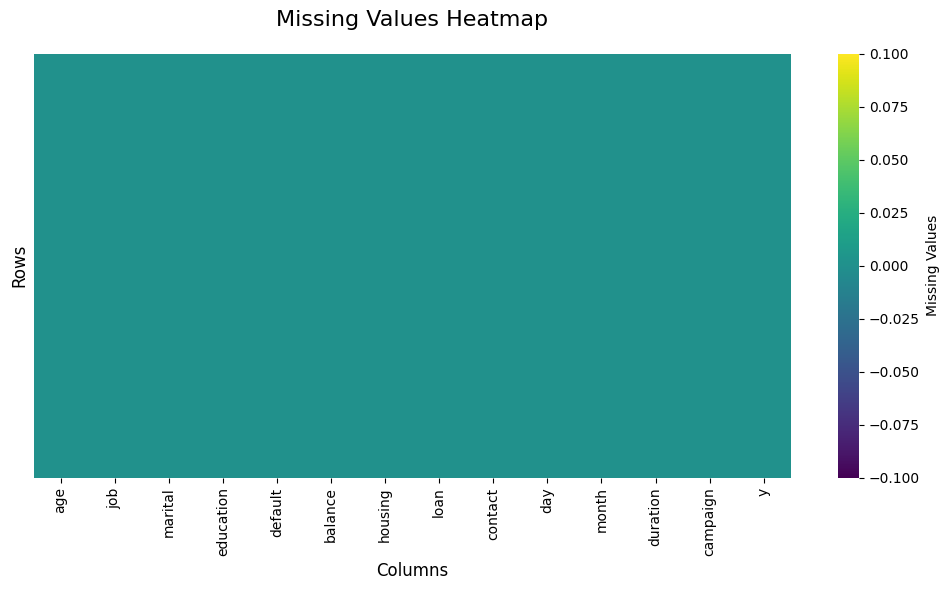

Missing Values Summary:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

Total missing values: 0
Percentage of missing data: 0.00%


In [24]:
# Checking  NaN values


# Create heatmap of NaN values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), 
            cbar=True,
            yticklabels=False,  # Hide row labels for cleaner look
            cmap='viridis',     # Color scheme
            cbar_kws={'label': 'Missing Values'})

plt.title('Missing Values Heatmap', fontsize=16, pad=20)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows', fontsize=12)
plt.tight_layout()
plt.show()

# Print summary statistics
print("Missing Values Summary:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")
print(f"Percentage of missing data: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")




The dataset doesn't contain any missing or empty value

In [25]:
# Separate independant variables and the targert variable

X = df.drop('y', axis = 1)
y = df["y"]

In [26]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1


In [27]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
39995     no
39996    yes
39997    yes
39998     no
39999     no
Name: y, Length: 40000, dtype: object

In [28]:
y.value_counts()

y
no     37104
yes     2896
Name: count, dtype: int64

The classes in the dataset are unbalanced. This ensures that the model may be biased toward a majority class and can't generalize well across all categories. To solve this, we're goint to use SMOTE resampling method.

In [29]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Modeling

=== TRAINING MODELS ===

Training XGBoost...


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:19:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBOOST THRESHOLD ANALYSIS ===
Threshold	|	F1 Score Class 1
-----------------------------------
0.20		|	0.5628
0.25		|	0.5655
0.30		|	0.5708
0.35		|	0.5831
0.40		|	0.5746
0.45		|	0.5627
0.50		|	0.5331
0.55		|	0.5159
0.60		|	0.4940
0.65		|	0.4374
0.70		|	0.4103
0.75		|	0.3401
0.80		|	0.2632

=== XGBOOST OPTIMAL THRESHOLD ===
Optimal threshold: 0.35
Best F1 Score class 1: 0.5831

=== XGBOOST CLASSIFICATION REPORT (Threshold = 0.35) ===
              precision    recall  f1-score   support

     Class 0       0.98      0.95      0.96      7424
     Class 1       0.50      0.69      0.58       576

    accuracy                           0.93      8000
   macro avg       0.74      0.82      0.77      8000
weighted avg       0.94      0.93      0.93      8000


Training Logistic Regression...

=== LOGISTIC REGRESSION THRESHOLD ANALYSIS ===
Threshold	|	F1 Score Class 1
-----------------------------------
0.20		|	0.3369
0.25		|	0.3686
0.30		|	0.4016
0.35		|	0.4333
0.40		|	0.4588
0.45		|	0

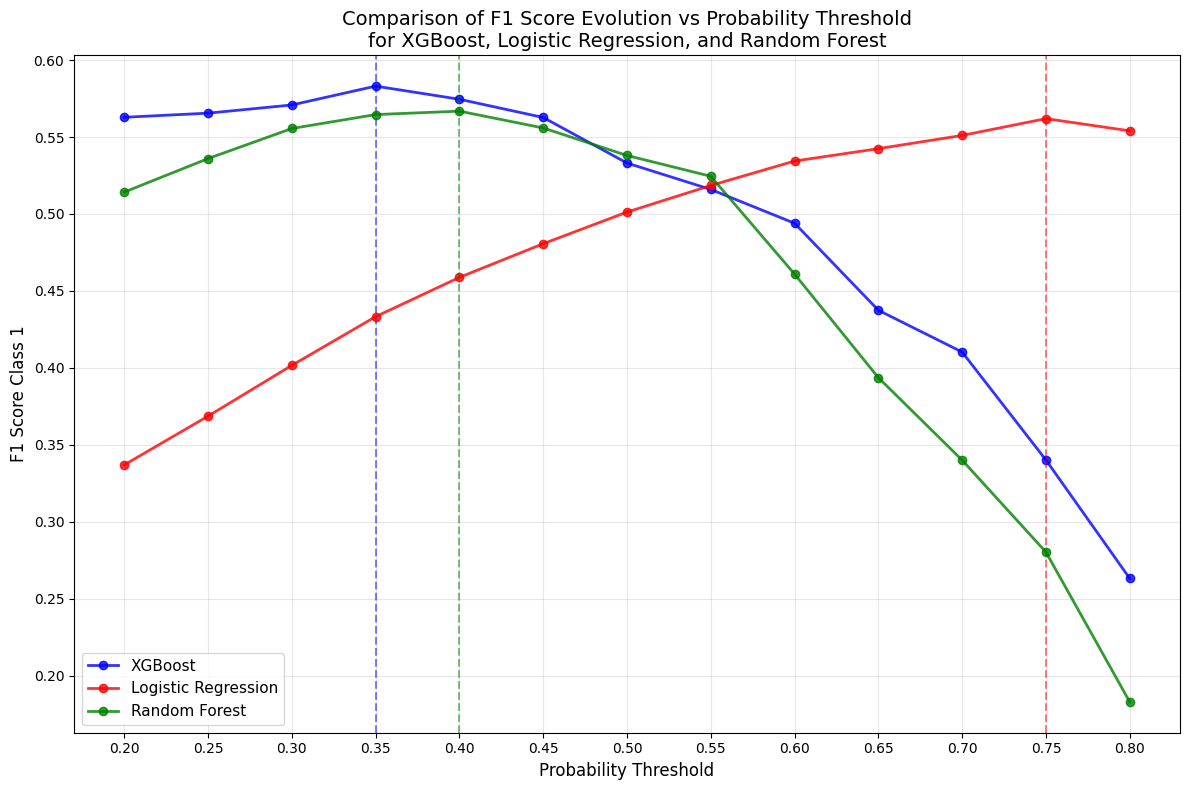


                            MODEL COMPARISON SUMMARY                            
Model                | Optimal Threshold  | Best F1 Score   | Default F1 (0.5)
--------------------------------------------------------------------------------
XGBoost              | 0.35               | 0.5831          | 0.5331         
Logistic Regression  | 0.75               | 0.5620          | 0.5013         
Random Forest        | 0.40               | 0.5668          | 0.5380         

🏆 BEST PERFORMING MODEL: XGBoost
   Best F1 Score: 0.5831
   Optimal Threshold: 0.35


In [34]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

def create_optimized_predictor(base_model, optimal_threshold, preprocessor, label_encoder, binary_encoders, model_name):
    """
    Creates an optimized prediction function that automatically uses 
    the optimal threshold and applies preprocessing.
    
    Parameters:
    -----------
    base_model : sklearn model
        The trained model
    optimal_threshold : float
        The optimal probability threshold for class 1
    preprocessor : Pipeline
        The preprocessing pipeline
    label_encoder : LabelEncoder
        Target label encoder
    binary_encoders : dict
        Dictionary of label encoders for binary columns
    model_name : str
        Name of the model for identification
        
    Returns:
    --------
    dict : Dictionary containing prediction functions and model components
    """
    
    def preprocess_input(X):
        """Apply the same preprocessing as during training"""
        X_copy = X.copy()
        
        # Apply binary encoders
        for col, encoder in binary_encoders.items():
            if col in X_copy.columns:
                X_copy[col] = encoder.transform(X_copy[col])
        
        # Apply preprocessor
        return preprocessor.transform(X_copy)
    
    def predict_proba(X):
        """Return predicted probabilities after preprocessing"""
        X_processed = preprocess_input(X)
        return base_model.predict_proba(X_processed)
    
    def predict(X):
        """Predict using the optimal threshold"""
        probas = predict_proba(X)
        class_1_index = np.where(base_model.classes_ == 1)[0][0]
        probas_class_1 = probas[:, class_1_index]
        predictions = (probas_class_1 >= optimal_threshold).astype(int)
        return predictions
    
    def get_threshold():
        """Return the optimal threshold used"""
        return optimal_threshold
    
    def get_classes():
        """Return the model classes"""
        return base_model.classes_
    
    # Create a dictionary with all necessary functions and data
    optimized_model = {
        'predict': predict,
        'predict_proba': predict_proba,
        'get_threshold': get_threshold,
        'get_classes': get_classes,
        'base_model': base_model,
        'optimal_threshold': optimal_threshold,
        'preprocessor': preprocessor,
        'label_encoder': label_encoder,
        'binary_encoders': binary_encoders,
        'classes_': base_model.classes_,
        'model_name': model_name
    }
    
    return optimized_model

def save_optimized_model(optimized_model, filepath):
    """Save the optimized model to disk."""
    with open(filepath, 'wb') as f:
        pickle.dump(optimized_model, f)

def load_optimized_model(filepath):
    """Load a saved optimized model from disk."""
    with open(filepath, 'rb') as f:
        return pickle.load(f)

def train_multiple_models_with_threshold_analysis(X_train, y_train, X_test, y_test):
    """
    Train multiple models (XGBoost, Logistic Regression, Random Forest) with 
    preprocessing and SMOTE, then analyze F1 score of class 1 for different 
    probability thresholds to find the optimal one for each model.
    
    Returns optimized models for all three algorithms with comparison visualization.
    
    Parameters:
    -----------
    X_train : pd.DataFrame
        Training feature set
    y_train : pd.Series
        Training labels (not encoded)
    X_test : pd.DataFrame
        Test feature set
    y_test : pd.Series
        Test labels (not encoded)
    
    Returns:
    --------
    dict : Dictionary containing results for all three models
    """

    # Step 1: Encode target labels
    le_y = LabelEncoder()
    y_train_enc = le_y.fit_transform(y_train)
    y_test_enc = le_y.transform(y_test)

    # Step 2: Identify different column types for appropriate preprocessing
    num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
    obj_cols = X_train.select_dtypes(include=['object']).columns.tolist()

    # Identify binary 'yes'/'no' columns among object columns
    binary_cols = [col for col in obj_cols 
                   if set(X_train[col].dropna().unique()) <= {'yes', 'no'}]

    # Identify other categorical columns for one-hot encoding
    cat_cols = list(set(obj_cols) - set(binary_cols))

    # Step 3: Prepare data copies
    X_train_copy = X_train.copy()
    X_test_copy = X_test.copy()

    # Step 4: Encode binary yes/no columns with LabelEncoder
    le_dict = {}
    for col in binary_cols:
        le = LabelEncoder()
        X_train_copy[col] = le.fit_transform(X_train_copy[col])
        X_test_copy[col] = le.transform(X_test_copy[col])
        le_dict[col] = le

    # Step 5: Define preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
            ('bin', 'passthrough', binary_cols)
        ]
    )

    preprocessing_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor)
    ])

    # Step 6: Apply preprocessing to training and test data
    X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train_copy)
    X_test_preprocessed = preprocessing_pipeline.transform(X_test_copy)

    # Step 7: Apply SMOTE to balance training data
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_preprocessed, y_train_enc)

    # Step 8: Define the three models
    models = {
        'XGBoost': XGBClassifier(
            random_state=42,
            eval_metric='logloss',
            use_label_encoder=False
        ),
        'Logistic Regression': LogisticRegression(
            random_state=42,
            max_iter=1000
        ),
        'Random Forest': RandomForestClassifier(
            random_state=42,
            n_estimators=100
        )
    }

    # Step 9: Train all models and perform threshold analysis
    results = {}
    thresholds = np.arange(0.2, 0.81, 0.05)
    
    print("=== TRAINING MODELS ===")
    
    # Store F1 scores for visualization
    all_f1_scores = {}
    colors = ['blue', 'red', 'green']
    
    for i, (model_name, model) in enumerate(models.items()):
        print(f"\nTraining {model_name}...")
        
        # Train the model
        model.fit(X_train_res, y_train_res)
        
        # Get probability predictions on test set
        y_proba = model.predict_proba(X_test_preprocessed)
        
        # Find which column corresponds to class 1
        class_1_index = np.where(model.classes_ == 1)[0][0]
        y_proba_class_1 = y_proba[:, class_1_index]
        
        # Test different probability thresholds
        f1_scores_class_1 = []
        
        print(f"\n=== {model_name.upper()} THRESHOLD ANALYSIS ===")
        print("Threshold\t|\tF1 Score Class 1")
        print("-" * 35)
        
        for threshold in thresholds:
            y_pred_threshold = (y_proba_class_1 >= threshold).astype(int)
            f1_class_1 = f1_score(y_test_enc, y_pred_threshold, pos_label=1)
            f1_scores_class_1.append(f1_class_1)
            print(f"{threshold:.2f}\t\t|\t{f1_class_1:.4f}")
        
        # Store F1 scores for comparison plot
        all_f1_scores[model_name] = f1_scores_class_1
        
        # Find optimal threshold
        best_threshold_idx = np.argmax(f1_scores_class_1)
        best_threshold = thresholds[best_threshold_idx]
        best_f1_class_1 = f1_scores_class_1[best_threshold_idx]
        
        print(f"\n=== {model_name.upper()} OPTIMAL THRESHOLD ===")
        print(f"Optimal threshold: {best_threshold:.2f}")
        print(f"Best F1 Score class 1: {best_f1_class_1:.4f}")
        
        # Create optimized model
        optimized_model = create_optimized_predictor(
            base_model=model,
            optimal_threshold=best_threshold,
            preprocessor=preprocessing_pipeline,
            label_encoder=le_y,
            binary_encoders=le_dict,
            model_name=model_name
        )
        
        # Get final predictions
        y_pred_best = optimized_model['predict'](X_test)
        
        # Display classification report
        print(f"\n=== {model_name.upper()} CLASSIFICATION REPORT (Threshold = {best_threshold:.2f}) ===")
        print(classification_report(y_test_enc, y_pred_best, 
                                  target_names=[f'Class {i}' for i in model.classes_]))
        
        # Store results
        results[model_name] = {
            'optimized_model': optimized_model,
            'base_model': model,
            'preprocessor': preprocessing_pipeline,
            'label_encoder': le_y,
            'binary_encoders': le_dict,
            'thresholds': thresholds,
            'f1_scores_class_1': f1_scores_class_1,
            'best_threshold': best_threshold,
            'best_f1_class_1': best_f1_class_1,
            'y_proba': y_proba,
            'y_pred_best': y_pred_best
        }

    # Step 10: Create comparison visualization
    plt.figure(figsize=(12, 8))
    
    for i, (model_name, f1_scores) in enumerate(all_f1_scores.items()):
        best_threshold = results[model_name]['best_threshold']
        plt.plot(thresholds, f1_scores, 'o-', linewidth=2, markersize=6, 
                color=colors[i], label=f'{model_name}', alpha=0.8)
        
        # Mark optimal threshold for each model
        plt.axvline(x=best_threshold, color=colors[i], linestyle='--', alpha=0.5)
        
        # Mark optimal threshold for each model (vertical lines only)
        best_f1 = results[model_name]['best_f1_class_1']

    plt.xlabel('Probability Threshold', fontsize=12)
    plt.ylabel('F1 Score Class 1', fontsize=12)
    plt.title('Comparison of F1 Score Evolution vs Probability Threshold\nfor XGBoost, Logistic Regression, and Random Forest', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=11)
    plt.xticks(np.arange(0.2, 0.81, 0.05))
    plt.tight_layout()
    plt.show()

    # Step 11: Summary comparison
    print(f"\n" + "="*80)
    print(f"{'MODEL COMPARISON SUMMARY':^80}")
    print(f"="*80)
    print(f"{'Model':<20} | {'Optimal Threshold':<18} | {'Best F1 Score':<15} | {'Default F1 (0.5)':<15}")
    print("-" * 80)
    
    for model_name in results.keys():
        best_threshold = results[model_name]['best_threshold']
        best_f1 = results[model_name]['best_f1_class_1']
        
        # Calculate F1 at default threshold (0.5)
        default_idx = np.where(thresholds == 0.5)[0]
        if len(default_idx) > 0:
            default_f1 = results[model_name]['f1_scores_class_1'][default_idx[0]]
        else:
            # If 0.5 not exactly in thresholds, interpolate
            default_f1 = np.interp(0.5, thresholds, results[model_name]['f1_scores_class_1'])
        
        print(f"{model_name:<20} | {best_threshold:<18.2f} | {best_f1:<15.4f} | {default_f1:<15.4f}")
    
    print("="*80)
    
    # Find best performing model
    best_model_name = max(results.keys(), key=lambda x: results[x]['best_f1_class_1'])
    print(f"\n🏆 BEST PERFORMING MODEL: {best_model_name}")
    print(f"   Best F1 Score: {results[best_model_name]['best_f1_class_1']:.4f}")
    print(f"   Optimal Threshold: {results[best_model_name]['best_threshold']:.2f}")
    
    return results

# Usage example:

# Train all models
all_results = train_multiple_models_with_threshold_analysis(X_train, y_train, X_test, y_test)

XGBoost has the best F1 score(0.58). So, I am going to optimize this model.

# Models Optimisation

# XGBoost Optimisation

Using optimized model with threshold: 0.35
Starting GridSearchCV optimization...
Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:08:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== GRIDSEARCH RESULTS ===
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
F1 Score on Test Set: 0.5430
Original optimized model F1 Score: 0.5831
Improvement from GridSearch: -0.0401


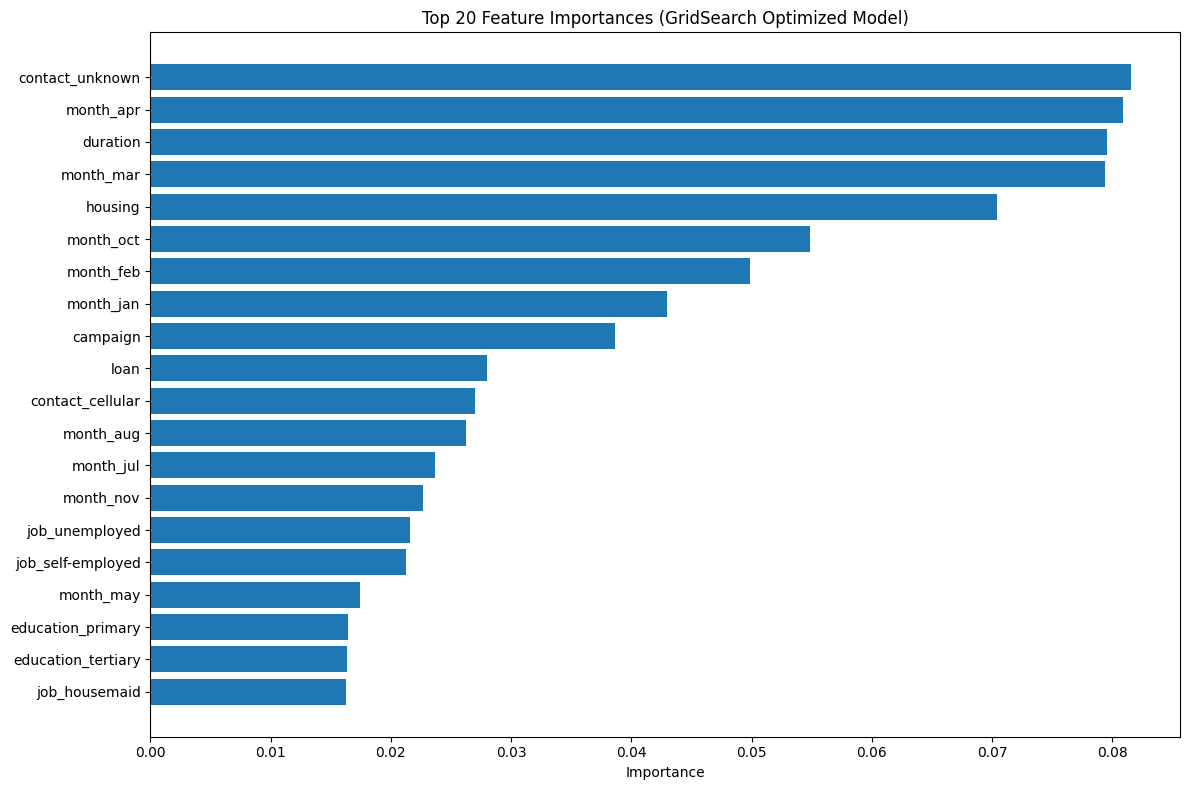


=== TOP 10 MOST IMPORTANT FEATURES ===
        Feature  Importance
contact_unknown    0.081542
      month_apr    0.080863
       duration    0.079591
      month_mar    0.079350
        housing    0.070418
      month_oct    0.054839
      month_feb    0.049858
      month_jan    0.042934
       campaign    0.038660
           loan    0.028034


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, make_scorer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def train_xgb_with_gridsearch(X_train, y_train, X_test, y_test, optimized_model_results):
    """
    Train an XGBoost model using an already optimized model as base, 
    optimize hyperparameters with GridSearchCV, 
    and display feature importance.

    Steps:
    1. Use the optimized model from previous threshold analysis
    2. Extract the base XGBoost model and preprocessing components
    3. Use the same preprocessing pipeline and encoders
    4. Apply SMOTE using the same configuration
    5. Use GridSearchCV to find the best XGBoost hyperparameters
    6. Train the model with the best parameters
    7. Evaluate with F1 score
    8. Display feature importance

    Parameters:
    -----------
    X_train : pd.DataFrame
        Training feature set
    y_train : pd.Series
        Training labels (not encoded)
    X_test : pd.DataFrame
        Test feature set
    y_test : pd.Series
        Test labels (not encoded)
    optimized_model_results : dict
        Results dictionary from train_xgb_with_smote_and_threshold_analysis function
        containing the optimized model and preprocessing components

    Returns:
    --------
    dict : Dictionary containing:
        - 'preprocessor': fitted preprocessing pipeline
        - 'best_model': trained XGBoost model with best params
        - 'label_encoder': LabelEncoder for target
        - 'binary_encoders': dictionary of LabelEncoders for binary features
        - 'best_params': best hyperparameters from GridSearchCV
        - 'f1_score': F1 score on test set
        - 'optimal_threshold': optimal threshold from the optimized model
    """

    # -------------------------------
    # 1. Extract components from optimized model results
    # -------------------------------
    optimized_model = optimized_model_results['optimized_model']
    preprocessing_pipeline = optimized_model_results['preprocessor']
    le_y = optimized_model_results['label_encoder']
    le_dict = optimized_model_results['binary_encoders']
    optimal_threshold = optimized_model_results['best_threshold']
    
    print(f"Using optimized model with threshold: {optimal_threshold:.2f}")
    
    # -------------------------------
    # 2. Encode target labels using existing encoder
    # -------------------------------
    y_train_enc = le_y.transform(y_train)
    y_test_enc = le_y.transform(y_test)

    # -------------------------------
    # 3. Identify feature types (same as optimized model)
    # -------------------------------
    num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
    obj_cols = X_train.select_dtypes(include=['object']).columns.tolist()

    binary_cols = [col for col in obj_cols 
                   if set(X_train[col].dropna().unique()) <= {'yes', 'no'}]
    cat_cols = list(set(obj_cols) - set(binary_cols))

    # -------------------------------
    # 4. Apply binary encoding using existing encoders
    # -------------------------------
    X_train_copy = X_train.copy()
    X_test_copy = X_test.copy()
    
    for col in binary_cols:
        if col in le_dict:
            X_train_copy[col] = le_dict[col].transform(X_train_copy[col])
            X_test_copy[col] = le_dict[col].transform(X_test_copy[col])

    # -------------------------------
    # 5. Apply preprocessing using existing pipeline
    # -------------------------------
    X_train_preprocessed = preprocessing_pipeline.transform(X_train_copy)
    X_test_preprocessed = preprocessing_pipeline.transform(X_test_copy)

    # -------------------------------
    # 6. Apply SMOTE on training data
    # -------------------------------
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_preprocessed, y_train_enc)

    # -------------------------------
    # 7. Use the base model from optimized results as starting point
    # -------------------------------
    base_xgb_model = optimized_model['base_model']

    # -------------------------------
    # 8. Define hyperparameter grid for GridSearchCV
    # -------------------------------
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }

    # Use F1 score as the scoring metric
    scorer = make_scorer(f1_score)

    grid_search = GridSearchCV(
        estimator=base_xgb_model,
        param_grid=param_grid,
        scoring=scorer,
        cv=5,
        verbose=1,
        n_jobs=-1
    )

    # -------------------------------
    # 9. Fit GridSearchCV
    # -------------------------------
    print("Starting GridSearchCV optimization...")
    grid_search.fit(X_train_res, y_train_res)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # -------------------------------
    # 10. Evaluate model on test set
    # -------------------------------
    y_pred_enc = best_model.predict(X_test_preprocessed)
    f1 = f1_score(y_test_enc, y_pred_enc)

    print(f"\n=== GRIDSEARCH RESULTS ===")
    print(f"Best Parameters: {best_params}")
    print(f"F1 Score on Test Set: {f1:.4f}")
    
    # Compare with original optimized model performance
    original_f1 = optimized_model_results['best_f1_class_1']
    print(f"Original optimized model F1 Score: {original_f1:.4f}")
    improvement = f1 - original_f1
    print(f"Improvement from GridSearch: {improvement:+.4f}")

    # -------------------------------
    # 11. Feature importance analysis
    # -------------------------------
    try:
        # Get feature names from the preprocessing pipeline
        if hasattr(preprocessing_pipeline.named_steps['preprocessor'], 'transformers_'):
            feature_names = []
            
            # Add numeric column names
            feature_names.extend(num_cols)
            
            # Add one-hot encoded categorical feature names
            if cat_cols:
                cat_transformer = preprocessing_pipeline.named_steps['preprocessor'].named_transformers_['cat']
                if hasattr(cat_transformer, 'get_feature_names_out'):
                    feature_names.extend(cat_transformer.get_feature_names_out(cat_cols))
                else:
                    # Fallback for older sklearn versions
                    feature_names.extend([f"{col}_{val}" for col in cat_cols for val in cat_transformer.categories_[cat_cols.index(col)]])
            
            # Add binary column names
            feature_names.extend(binary_cols)
            
            # Get feature importances
            importances = best_model.feature_importances_
            
            # Create importance DataFrame
            importance_df = pd.DataFrame({
                'Feature': feature_names[:len(importances)],  # Ensure same length
                'Importance': importances
            }).sort_values(by='Importance', ascending=False)

            # Plot feature importance
            plt.figure(figsize=(12, 8))
            top_features = importance_df.head(20)  # Show top 20 features
            plt.barh(range(len(top_features)), top_features['Importance'])
            plt.yticks(range(len(top_features)), top_features['Feature'])
            plt.gca().invert_yaxis()
            plt.title('Top 20 Feature Importances (GridSearch Optimized Model)')
            plt.xlabel('Importance')
            plt.tight_layout()
            plt.show()
            
            print(f"\n=== TOP 10 MOST IMPORTANT FEATURES ===")
            print(importance_df.head(10).to_string(index=False))
            
    except Exception as e:
        print(f"Warning: Could not generate feature importance plot: {e}")
        print("Feature names might not match the number of features after preprocessing.")

    # -------------------------------
    # 12. Return comprehensive results
    # -------------------------------
    return {
        'preprocessor': preprocessing_pipeline,
        'best_model': best_model,
        'label_encoder': le_y,
        'binary_encoders': le_dict,
        'best_params': best_params,
        'f1_score': f1,
        'optimal_threshold': optimal_threshold,
        'original_optimized_model': optimized_model,
        'grid_search_cv': grid_search
    }



# Then, run hyperparameter optimization using the optimized model
results_gridsearch = train_xgb_with_gridsearch(X_train, y_train, X_test, y_test, results)



The most important variables are contact_unknown, month, duration, housing, campaign and loan.

# Determine the segment(s) of customers client should prioritize.

# DBSCAN Clustering Method

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import DBSCAN
from scipy.stats import mode

def customer_segmentation_dbscan(df, y_col=None, eps=0.5, min_samples=5):
    """
    Cluster customers with DBSCAN and summarize min/mean/max for numeric
    and most frequent for categorical features.
    """
    df = df.copy()

    # Separate target variable
    y = None
    y_encoder = None
    if y_col:
        le_y = LabelEncoder()
        y = le_y.fit_transform(df[y_col])
        y_encoder = le_y
        df = df.drop(columns=[y_col])

    # Identify feature types
    num_features = df.select_dtypes(include=[np.number]).columns.tolist()
    cat_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

    # Split categorical features into binary_yesno and others
    binary_features = []
    multi_cat_features = []
    for col in cat_features:
        unique_vals = df[col].dropna().unique()
        if set(map(str.lower, unique_vals)) <= {"yes", "no"}:
            binary_features.append(col)
        else:
            multi_cat_features.append(col)

    # Pipelines for preprocessing
    transformers = []

    if num_features:
        transformers.append(("num", StandardScaler(), num_features))

    if binary_features:
        # Binary yes/no → LabelEncoder
        for col in binary_features:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))

        transformers.append(("binary", "passthrough", binary_features))

    if multi_cat_features:
        transformers.append(("multi_cat", OneHotEncoder(handle_unknown="ignore"), multi_cat_features))

    preprocessor = ColumnTransformer(transformers=transformers)

    # Build pipeline
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("clusterer", DBSCAN(eps=eps, min_samples=min_samples))
    ])

    # Fit DBSCAN
    cluster_labels = pipeline.fit_predict(df)

    df_clustered = df.copy()
    df_clustered["cluster"] = cluster_labels

    # Summary statistics as DataFrame
    summary_data = []
    
    for cluster_id, group in df_clustered.groupby("cluster"):
        row = {"cluster": cluster_id, "count": len(group)}
        
        # Y variable: mean with respect to class 1 (if y exists)
        if y is not None:
            cluster_indices = group.index
            y_cluster = y[cluster_indices]
            row["y_mean_class1"] = np.mean(y_cluster)
        
        # Numeric features: min, mean, max
        for col in num_features:
            row[f"{col}_min"] = group[col].min()
            row[f"{col}_mean"] = group[col].mean()
            row[f"{col}_max"] = group[col].max()
        
        # Categorical features: most frequent
        for col in binary_features + multi_cat_features:
            mode_series = group[col].mode()
            if not mode_series.empty:
                most_freq = mode_series.iloc[0]
            else:
                most_freq = group[col].iloc[0] if len(group[col]) > 0 else None
            row[f"{col}_most_frequent"] = most_freq
        
        summary_data.append(row)
    
    summary_df = pd.DataFrame(summary_data)

    return {
        "clusters": cluster_labels,
        "summary": summary_df,
        "pipeline": pipeline,
        "y_encoded": y,
        "y_encoder": y_encoder
    }

In [ ]:
response = customer_segmentation_dbscan(df, y_col='y')
response["summary"]  

In [ ]:
response["summary"]  

,cluster,count,y_mean_class1,age_min,age_mean,age_max,balance_min,balance_mean,balance_max,day_min,...,campaign_mean,campaign_max,default_most_frequent,housing_most_frequent,loan_most_frequent,job_most_frequent,marital_most_frequent,education_most_frequent,contact_most_frequent,month_most_frequent
0,-1,33767,0.083898,19,41.205052,95,-8019,1430.046347,102127,1,...,3.068321,63,0,1,0,blue-collar,married,secondary,cellular,may
1,0,40,0.000000,29,39.800000,51,-120,275.725000,1510,5,...,1.575000,4,0,1,0,management,married,tertiary,unknown,may
2,1,58,0.000000,22,30.948276,42,-235,389.103448,1704,5,...,1.517241,3,0,1,0,admin,single,secondary,unknown,may
3,2,47,0.000000,24,34.638298,42,-315,271.042553,1263,5,...,1.765957,4,0,1,0,services,married,secondary,unknown,may
4,3,438,0.002283,24,37.726027,59,-972,428.728311,3514,5,...,1.783105,5,0,1,0,blue-collar,married,secondary,unknown,may
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,338,4,0.000000,33,35.000000,37,-173,29.250000,355,18,...,3.250000,4,0,1,0,blue-collar,married,secondary,cellular,may
340,339,11,0.181818,25,31.181818,36,0,545.000000,1379,22,...,1.363636,2,0,0,0,management,single,tertiary,cellular,may
341,340,7,0.000000,32,34.000000,36,0,530.571429,1778,22,...,1.000000,1,0,0,0,management,married,tertiary,cellular,may
342,341,6,0.500000,25,26.000000,27,0,361.000000,715,22,...,1.500000,2,0,0,0,student,single,secondary,cellular,may


In [ ]:
summary_sorted = response["summary"].sort_values('y_mean_class1', ascending=False)
summary_sorted

,cluster,count,y_mean_class1,age_min,age_mean,age_max,balance_min,balance_mean,balance_max,day_min,...,campaign_mean,campaign_max,default_most_frequent,housing_most_frequent,loan_most_frequent,job_most_frequent,marital_most_frequent,education_most_frequent,contact_most_frequent,month_most_frequent
325,324,6,0.666667,31,32.833333,36,178,585.000000,953,12,...,1.000000,1,0,1,0,blue-collar,single,secondary,cellular,may
308,307,5,0.600000,26,28.800000,31,-110,183.000000,524,5,...,1.200000,2,0,1,0,blue-collar,single,secondary,cellular,may
342,341,6,0.500000,25,26.000000,27,0,361.000000,715,22,...,1.500000,2,0,0,0,student,single,secondary,cellular,may
343,342,5,0.400000,27,28.800000,30,6,460.400000,707,25,...,1.000000,1,0,0,0,technician,single,secondary,cellular,may
285,284,5,0.400000,29,33.000000,35,0,303.800000,703,14,...,1.000000,1,0,1,0,management,married,tertiary,cellular,apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,24,3,0.000000,59,59.333333,60,10,108.333333,179,5,...,2.666667,3,0,1,0,blue-collar,married,primary,unknown,may
24,23,7,0.000000,28,31.714286,34,0,278.571429,804,6,...,1.714286,2,0,1,1,services,married,secondary,unknown,may
5,4,53,0.000000,31,40.792453,48,0,433.169811,1937,5,...,1.773585,4,0,1,0,technician,married,secondary,unknown,may
326,325,4,0.000000,52,52.500000,54,143,612.000000,1117,12,...,1.500000,2,0,1,0,blue-collar,married,secondary,cellular,may


We should focus on the segments with the highest mean class 1 values, as these represent the groups most likely to respond positively to the term deposit offer.